#### Task 3

In [16]:
import numpy as np
import statsmodels.api as sm

##### Helper function

In [17]:
def showStats(file_name: str):
    x, y = np.loadtxt(f'data/{file_name}.csv', delimiter=',', unpack=True, skiprows=1)
    X_plus_one = np.stack((np.ones(x.size), x), axis=-1)
    ols = sm.OLS(y, X_plus_one)
    ols_result = ols.fit()
    print(ols_result.summary())

##### xy - 002

In [18]:
showStats('xy-002')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1370.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           2.10e-59
Time:                        21:54:09   Log-Likelihood:                -711.10
No. Observations:                 100   AIC:                             1426.
Df Residuals:                      98   BIC:                             1431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        652.8037     60.627     10.768      0.0

##### xy - 004

In [19]:
showStats('xy-004')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1537
Date:                Wed, 27 Mar 2024   Prob (F-statistic):              0.696
Time:                        21:54:09   Log-Likelihood:                -887.42
No. Observations:                 100   AIC:                             1779.
Df Residuals:                      98   BIC:                             1784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4124.0872    352.826     11.689      0.0

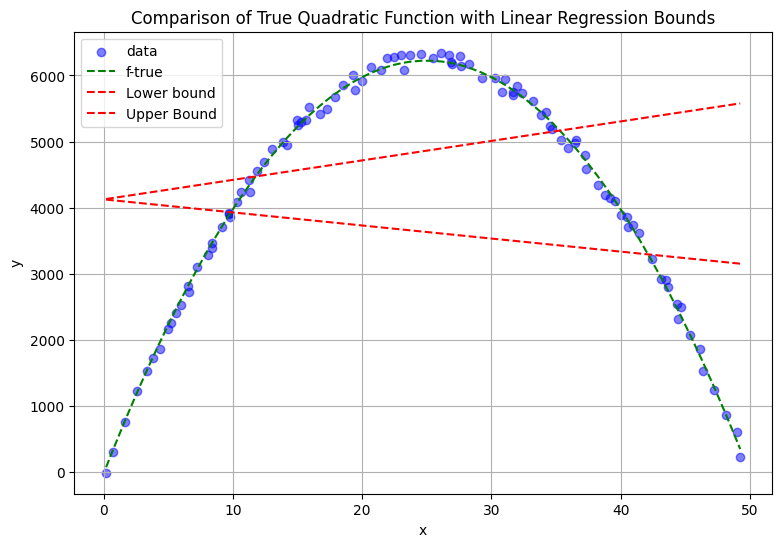

In [28]:
from matplotlib import pyplot as plt
import pandas as pd

data = pd.read_csv('data/xy-004.csv')
x, y = data['X'], data['Y']

y_true = -10 * x**2 + 500 * x - 25

intercept = 4124.0872
y_linear_lower = intercept + -19.771 * x
y_linear_upper = intercept + 29.505 * x


plt.figure(figsize=(9, 6))
plt.scatter(x, y, label='data', color='blue', alpha=0.5)
plt.plot(x, y_true, label='f-true', color='green', linestyle='--')
plt.plot(x, y_linear_lower, label='Lower bound', color='red', linestyle='--')
plt.plot(x, y_linear_upper, label='Upper Bound', color='red', linestyle='--')
plt.title('Comparison of True Quadratic Function with Linear Regression Bounds')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()